In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from keras import layers
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
n=np.unique(y_train)
n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
x_train = x_train/255
y_train = y_train/255

In [9]:
n=np.unique(y_train)
n

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412])

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
n=np.unique(y_train)
n

array([0., 1.])

In [12]:
model = keras.Sequential()

In [13]:
model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

C:\Users\Saif\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, batch_size=300, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.9646 - loss: 0.1974 - val_accuracy: 0.1000 - val_loss: 16761.6660
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 1.0000 - loss: 1.5967e-09 - val_accuracy: 0.1000 - val_loss: 16761.8145
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - accuracy: 1.0000 - loss: 4.6353e-09 - val_accuracy: 0.1000 - val_loss: 16762.0078
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 1.0000 - loss: 7.8235e-09 - val_accuracy: 0.1000 - val_loss: 16762.2520
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 1.0000 - loss: 1.6314e-09 - val_accuracy: 0.1000 - val_loss: 16762.5859
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 1.0000 - loss: 1.1198e-09 - val_accuracy: 0.1000 - val_loss: 16762.8359
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 1.0000 - loss: 1.4147e-10 - val_accuracy: 0.1000 - val_loss: 16763.1445
Epoch 8/10
167/167 ━━━━━━━━━━━━

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1001 - loss: 16802.0918


In [37]:
test_acc

0.10000000149011612

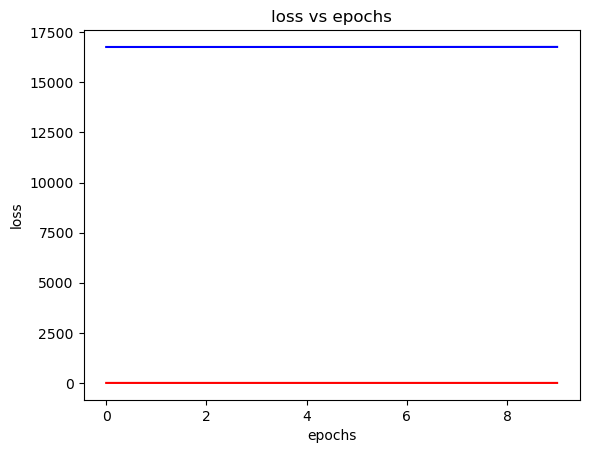

In [39]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.show()

In [41]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [53]:
n = 200
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

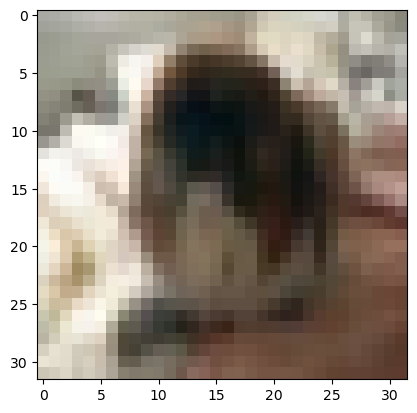

In [57]:
plt.imshow(x_test[n])